In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

DATA_PATH = Path("../data") / "url_phish.csv"
DATA_PATH

WindowsPath('../data/url_phish.csv')

In [2]:
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Dataset not found at: {DATA_PATH}")

df = pd.read_csv(DATA_PATH)
df.head()

,url,url_len,dom,dom_len,is_ip,tld,tld_len,subdom_cnt,letter_cnt,digit_cnt,...,under_cnt,letter_ratio,digit_ratio,spec_ratio,is_https,slash_cnt,entropy,path_len,query_len,label
0,https://www.rmit.edu.au/,24,rmit.edu.au,11,0,edu.au,6,1,17,0,...,0,0.708333,0.0,0.291667,1,3,3.709148,1,0,0
1,http://www.latrobe.edu.au/,26,latrobe.edu.au,14,0,edu.au,6,1,19,0,...,0,0.730769,0.0,0.269231,0,3,3.738149,1,0,0
2,https://www.cqu.edu.au/,23,cqu.edu.au,10,0,edu.au,6,1,16,0,...,0,0.695652,0.0,0.304348,1,3,3.609668,1,0,0
3,http://bond.edu.au/,19,bond.edu.au,11,0,edu.au,6,0,13,0,...,0,0.684211,0.0,0.315789,0,3,3.576618,1,0,0
4,http://www.csu.edu.au/,22,csu.edu.au,10,0,edu.au,6,1,15,0,...,0,0.681818,0.0,0.318182,0,3,3.503998,1,0,0


In [3]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nInfo:")
df.info()

print("\nLabel distribution:")
print(df["label"].value_counts())
print("\nLabel distribution (%):")
print(df["label"].value_counts(normalize=True) * 100)

Shape: (116600, 26)

Columns:
 ['url', 'url_len', 'dom', 'dom_len', 'is_ip', 'tld', 'tld_len', 'subdom_cnt', 'letter_cnt', 'digit_cnt', 'special_cnt', 'eq_cnt', 'qm_cnt', 'amp_cnt', 'dot_cnt', 'dash_cnt', 'under_cnt', 'letter_ratio', 'digit_ratio', 'spec_ratio', 'is_https', 'slash_cnt', 'entropy', 'path_len', 'query_len', 'label']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116600 entries, 0 to 116599
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   url           116600 non-null  object 
 1   url_len       116600 non-null  int64  
 2   dom           116600 non-null  object 
 3   dom_len       116600 non-null  int64  
 4   is_ip         116600 non-null  int64  
 5   tld           116586 non-null  object 
 6   tld_len       116600 non-null  int64  
 7   subdom_cnt    116600 non-null  int64  
 8   letter_cnt    116600 non-null  int64  
 9   digit_cnt     116600 non-null  int64  
 10  special_cnt   11

In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

df[numeric_cols].describe().T


Numeric columns: ['url_len', 'dom_len', 'is_ip', 'tld_len', 'subdom_cnt', 'letter_cnt', 'digit_cnt', 'special_cnt', 'eq_cnt', 'qm_cnt', 'amp_cnt', 'dot_cnt', 'dash_cnt', 'under_cnt', 'letter_ratio', 'digit_ratio', 'spec_ratio', 'is_https', 'slash_cnt', 'entropy', 'path_len', 'query_len', 'label']


,count,mean,std,min,25%,50%,75%,max
url_len,116600.0,32.952521,29.369989,12.000000,22.000000,27.000000,34.000000,1202.000000
dom_len,116600.0,12.845763,5.140745,4.000000,9.000000,11.000000,16.000000,62.000000
is_ip,116600.0,0.000111,0.010558,0.000000,0.000000,0.000000,0.000000,1.000000
tld_len,116600.0,3.320223,1.418215,0.000000,2.000000,3.000000,3.000000,22.000000
subdom_cnt,116600.0,0.845669,0.480620,0.000000,1.000000,1.000000,1.000000,7.000000
letter_cnt,116600.0,25.006810,22.396380,4.000000,16.000000,20.000000,27.000000,1037.000000
digit_cnt,116600.0,0.943988,5.947690,0.000000,0.000000,0.000000,0.000000,321.000000
special_cnt,116600.0,7.001724,3.995755,4.000000,6.000000,6.000000,7.000000,234.000000
eq_cnt,116600.0,0.079537,0.492609,0.000000,0.000000,0.000000,0.000000,29.000000
qm_cnt,116600.0,0.038379,0.199942,0.000000,0.000000,0.000000,0.000000,17.000000


In [5]:
missing_counts = df.isna().sum()
missing_counts[missing_counts > 0].sort_values(ascending=False)

tld    14
dtype: int64

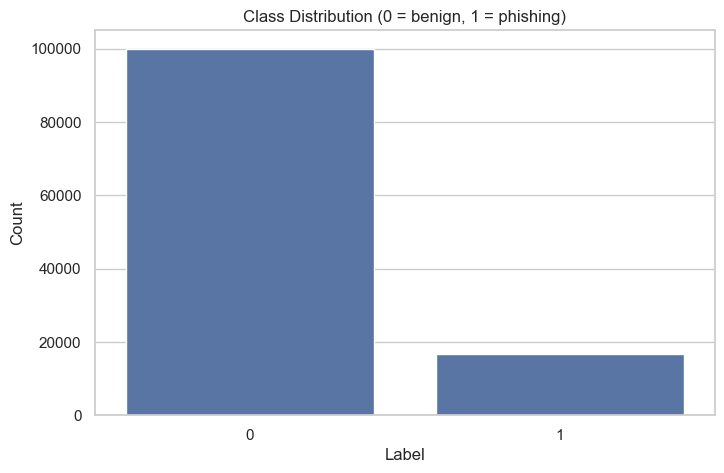

In [6]:
plt.figure()
sns.countplot(data=df, x="label")
plt.title("Class Distribution (0 = benign, 1 = phishing)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

Using features: ['entropy']


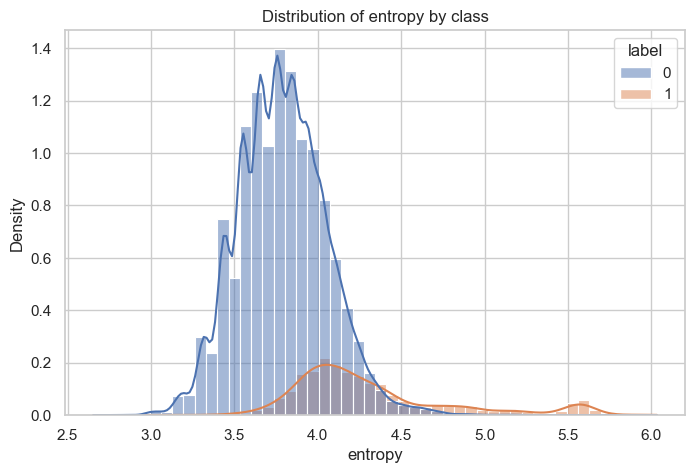

In [7]:
# Adjust these names to match your CSV columns
candidate_features = [
    "url_length",
    "domain_length",
    "num_subdomains",
    "num_dots",
    "num_special_chars",
    "entropy"
]

available_features = [c for c in candidate_features if c in df.columns]
print("Using features:", available_features)

for col in available_features:
    plt.figure()
    sns.histplot(data=df, x=col, hue="label", bins=50, kde=True, stat="density")
    plt.title(f"Distribution of {col} by class")
    plt.show()

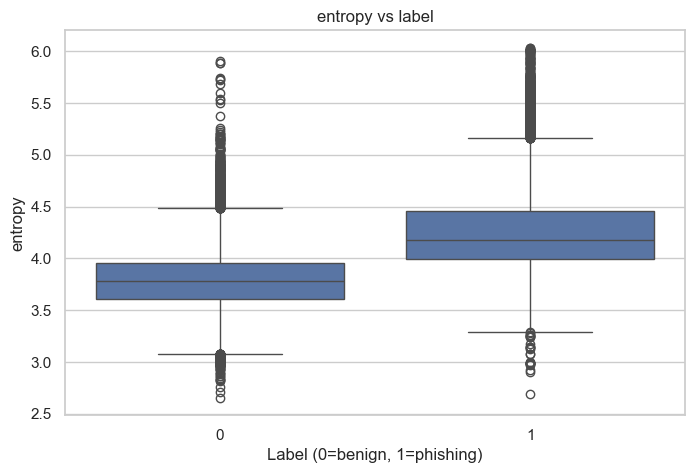

In [8]:
# Pick a subset to keep plots readable
top_features_for_boxplot = available_features[:5]

for col in top_features_for_boxplot:
    plt.figure()
    sns.boxplot(data=df, x="label", y=col)
    plt.title(f"{col} vs label")
    plt.xlabel("Label (0=benign, 1=phishing)")
    plt.show()

In [9]:
# Drop non-numeric columns except label
non_numeric = df.columns.difference(numeric_cols)
print("Non-numeric columns:", non_numeric.tolist())

# If url-like columns exist and you don't want them in ML:
to_drop = [col for col in non_numeric if col not in ["label"]]
df_clean = df.drop(columns=to_drop)

df_clean.to_csv("../data/url_phish_numeric.csv", index=False)
df_clean.head()

Non-numeric columns: ['dom', 'tld', 'url']


,url_len,dom_len,is_ip,tld_len,subdom_cnt,letter_cnt,digit_cnt,special_cnt,eq_cnt,qm_cnt,...,under_cnt,letter_ratio,digit_ratio,spec_ratio,is_https,slash_cnt,entropy,path_len,query_len,label
0,24,11,0,6,1,17,0,7,0,0,...,0,0.708333,0.0,0.291667,1,3,3.709148,1,0,0
1,26,14,0,6,1,19,0,7,0,0,...,0,0.730769,0.0,0.269231,0,3,3.738149,1,0,0
2,23,10,0,6,1,16,0,7,0,0,...,0,0.695652,0.0,0.304348,1,3,3.609668,1,0,0
3,19,11,0,6,0,13,0,6,0,0,...,0,0.684211,0.0,0.315789,0,3,3.576618,1,0,0
4,22,10,0,6,1,15,0,7,0,0,...,0,0.681818,0.0,0.318182,0,3,3.503998,1,0,0
